In [ ]:
#Setting It Up
#I collected all of the data above and combined them into one dataframe. The code and details are located here.
#First, we will import the libraries we will be using and also load our data into a Pandas dataframe.

# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sn
import sklearn

# Python magic to show plots inline in the notebook
%matplotlib inline
plt.style.use('ggplot')
import datetime as dt
from datetime import datetime
import math

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
p = pd.read_csv('/content/drive/MyDrive/ai4i2020.csv')

In [ ]:
print(p)

        UDI Product ID Type  Air temperature  Process temperature  \
0         1     M14860    M            298.1                308.6   
1         2     L47181    L            298.2                308.7   
2         3     L47182    L            298.1                308.5   
3         4     L47183    L            298.2                308.6   
4         5     L47184    L            298.2                308.7   
...     ...        ...  ...              ...                  ...   
9995   9996     M24855    M            298.8                308.4   
9996   9997     H39410    H            298.9                308.4   
9997   9998     M24857    M            299.0                308.6   
9998   9999     H39412    H            299.0                308.7   
9999  10000     M24859    M            299.0                308.7   

      Rotational speed  Torque  Tool wear  Machine failure  TWF  HDF  PWF  \
0                 1551    42.8          0                0    0    0    0   
1                

In [ ]:
#It is a good practice to understand the data first and try to gather as many insights from it.
#EDA is all about making sense of data in hand,before getting them dirty with it.

#1. Check for Missing Data
#2. Heatmap & Data Structure
#3. Correlations
#4. Select a list of predictor variables that will uncover a parsimonious model.

p.head() #return the first 5 rows of the dataframe

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
p.info()
#Variable description to see data size (entries) and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Machine failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [ ]:
#Check for Missing Data
p.isnull().values.any()
# If False, procced

False

In [ ]:
#summary statistics of the data
p.describe()

,UDI,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


<ipython-input-10-fddd908d96b0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = p.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

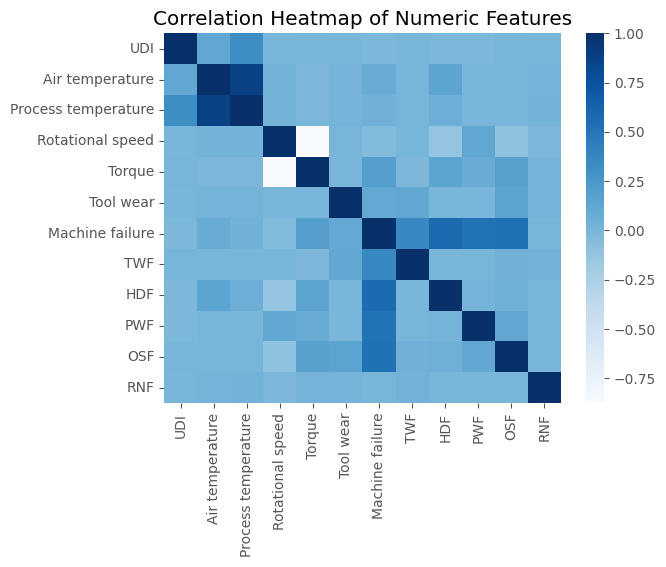

In [ ]:
#To use linear regression for modelling,its necessary to remove correlated variables to improve your model.
#One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.
corr = p.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

In [ ]:
#Data Preprocessing is essential here to transform, encode and bring the data to state that now the machine can easily parse it.
#In other words, the features of the data can now be easily interpreted by the algorithm

#Select variables with complete dataset (no nan or zero)
p_1 = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'Machine failure', 'TWF','HDF','PWF','OSF','RNF'])
p_MF = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'Machine failure'])
p_TWF = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'TWF'])
p_HDF = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'HDF'])
p_PWF = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'PWF',])
p_OSF = pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'OSF'])
p_RNF= pd.DataFrame(p,columns=['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'RNF'])

(array([110., 307., 247., 168.,  84.,  37.,  28.,  10.,   3.,   3.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.59044299,  1.54462417,  2.49880535,  3.45298653,  4.40716771,
         5.36134889,  6.31553007,  7.26971125,  8.22389243,  9.17807361,
        10.13225479, 11.08643597, 12.04061715, 12.99479833, 13.94897951,
        14.90316069, 15.85734187, 16.81152305, 17.76570423, 18.71988542,
        19.6740666 ]),
 <BarContainer object of 20 artists>)

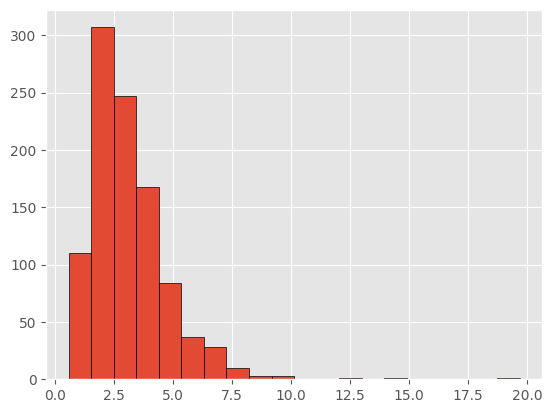

In [ ]:
#Normal Distribution
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_p_1 = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(lognorm_p_1, edgecolor='black', bins=20)

#By simply looking at this histogram, we can tell the dataset does not exhibit a “bell-shape” and is not normally distributed.

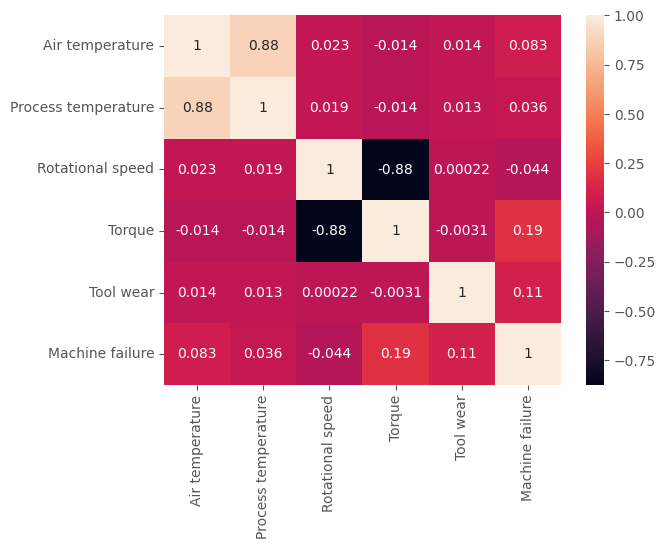

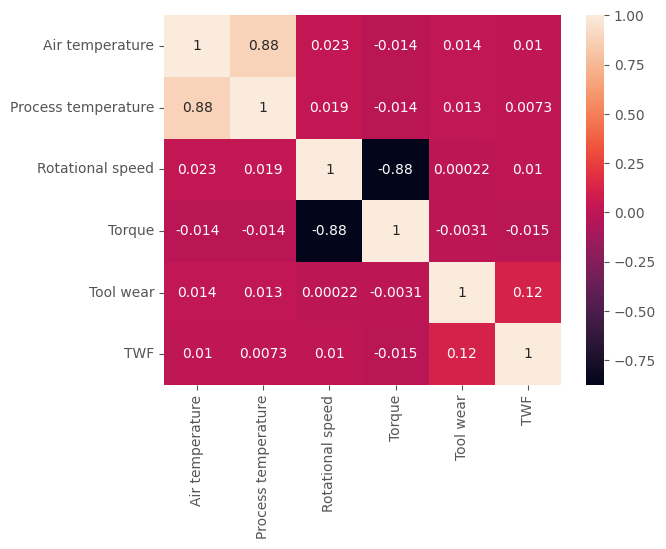

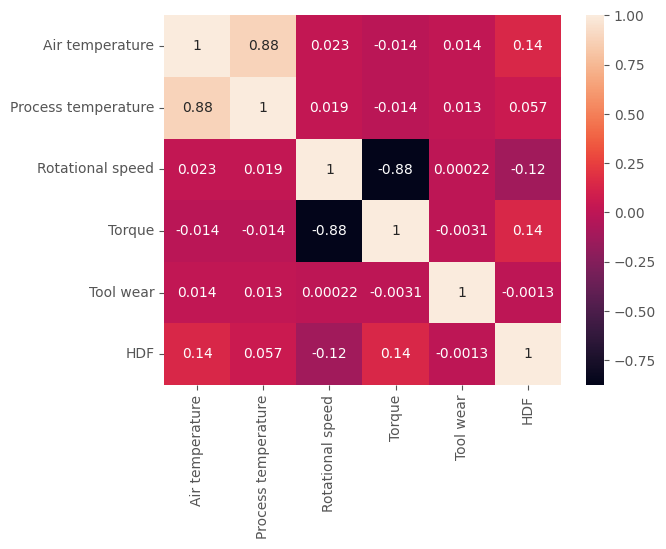

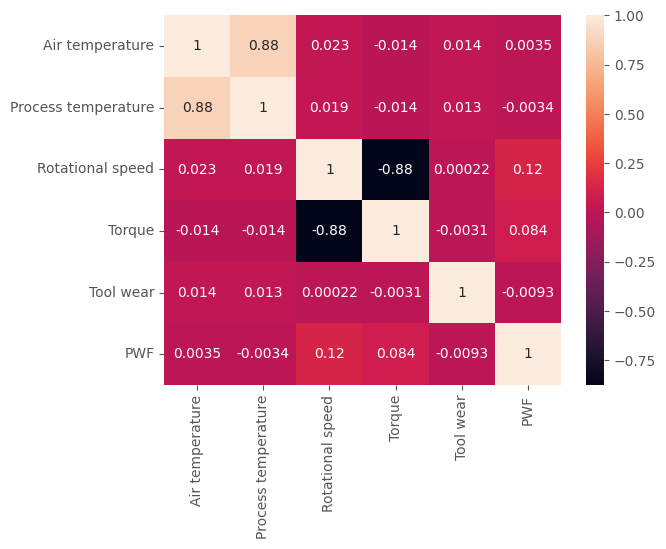

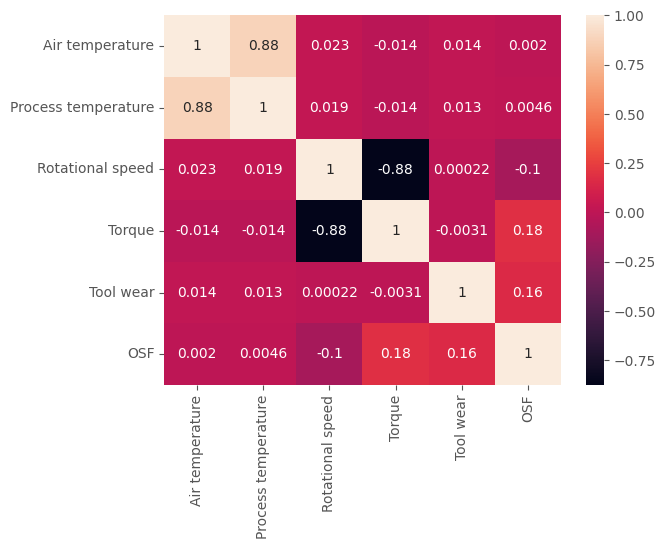

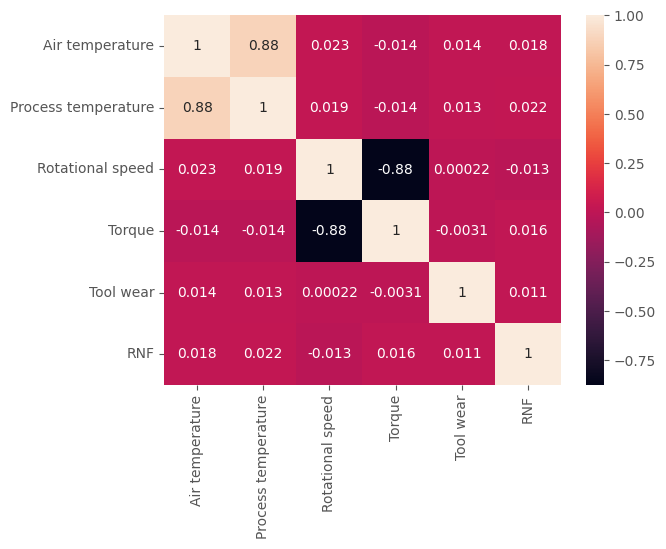

In [ ]:
#Remove correlated variables before feature selection.
corrMatrix = p_MF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = p_TWF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = p_HDF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = p_PWF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = p_OSF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = p_RNF.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# The logic behind using correlation for feature selection is that good variables correlate highly with the target.
# Furthermore, variables should be correlated with the target but uncorrelated among themselves.
# If two variables are correlated, one can predict the other.
# HDF is selected as the main target variable, since it has a relatively higher correlation value when compared to other targets.

In [ ]:
#Make final dataset
p_1.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
# Importing library
from scipy.stats import skew
skewness = skew(p_1)
print("Skewness:", skewness)
p_1.skew(axis = 1, skipna = True)
#the results suggest non-normality, since the value is higher than 0

Skewness: [ 1.14256779e-01  1.50250136e-02  1.99287202e+00 -9.51516829e-03
  2.72881450e-02  5.15107898e+00  1.46422650e+01  9.16341397e+00
  1.01129990e+01  9.95242248e+00  2.28761381e+01]


0       2.949353
1       2.879921
2       2.926808
3       2.894495
4       2.881353
          ...   
9995    2.972849
9996    2.984169
9997    2.989514
9998    2.883500
9999    2.930675
Length: 10000, dtype: float64

In [ ]:
p_1.dtypes

Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object

In [ ]:
# FEATURE ENGINEERING, immediately after Data Preprocessing
# (a)Feature engineering prepares the dataset to be compatible with the algorithm, and
# (b) Improves the performance of the machine learning models that will be used later.
##----------------------------------------------------------------------##
# Define custom function to create lag values.
#The lag features contains data about one observation and includes all previous events of the observation
def feature_lag(features):
    for feature in features:
        p_1[feature + '-lag1'] = p_1[feature].shift(1)
        p_1[feature + '-lag2'] = p_1[feature].shift(2)
        p_1[feature + '-lag3'] = p_1[feature].shift(3)
        p_1[feature + '-lag4'] = p_1[feature].shift(4)
# Define columns to create lags for the Preprocessed data
features = ['Air temperature','Process temperature','Rotational speed','Torque','Tool wear', 'Machine failure', 'TWF','HDF','PWF','OSF','RNF']

# Call custom function
feature_lag(features)

In [ ]:
p_1.dtypes

Air temperature             float64
Process temperature         float64
Rotational speed              int64
Torque                      float64
Tool wear                     int64
Machine failure               int64
TWF                           int64
HDF                           int64
PWF                           int64
OSF                           int64
RNF                           int64
Air temperature-lag1        float64
Air temperature-lag2        float64
Air temperature-lag3        float64
Air temperature-lag4        float64
Process temperature-lag1    float64
Process temperature-lag2    float64
Process temperature-lag3    float64
Process temperature-lag4    float64
Rotational speed-lag1       float64
Rotational speed-lag2       float64
Rotational speed-lag3       float64
Rotational speed-lag4       float64
Torque-lag1                 float64
Torque-lag2                 float64
Torque-lag3                 float64
Torque-lag4                 float64
Tool wear-lag1              

In [ ]:
p_1=p_1.fillna(p_1.mean())

In [ ]:
#Split into Training and Test Data
#Cross validation is always desired when training machine learning models to be able to trust the generality of the model created.
# ACTION (a) : We split our data into training and test data using Scikit learn's built in tools.
# ACTION (b) Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

X = p_1.drop(['HDF'], axis=1)
y = p_1['HDF']

#RATIONALE: Cross validation is essential for estimating the accuracy of the performance of the model.
#CONSEQUENCE: Again, this is to HELP prevent overfitting, a situation where the model trains the data too well.
#If this happens(i.e no cross validation), the 'perfection' will negatively impact the performance of the model

In [ ]:
from sklearn.model_selection import train_test_split
# ACTION (a) : Actual Split Process (90-10 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((9000, 54), (9000,))

In [ ]:
X_test.shape, y_test.shape

((1000, 54), (1000,))

In [ ]:
X.columns

Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'TWF', 'PWF', 'OSF', 'RNF',
       'Air temperature-lag1', 'Air temperature-lag2', 'Air temperature-lag3',
       'Air temperature-lag4', 'Process temperature-lag1',
       'Process temperature-lag2', 'Process temperature-lag3',
       'Process temperature-lag4', 'Rotational speed-lag1',
       'Rotational speed-lag2', 'Rotational speed-lag3',
       'Rotational speed-lag4', 'Torque-lag1', 'Torque-lag2', 'Torque-lag3',
       'Torque-lag4', 'Tool wear-lag1', 'Tool wear-lag2', 'Tool wear-lag3',
       'Tool wear-lag4', 'Machine failure-lag1', 'Machine failure-lag2',
       'Machine failure-lag3', 'Machine failure-lag4', 'TWF-lag1', 'TWF-lag2',
       'TWF-lag3', 'TWF-lag4', 'HDF-lag1', 'HDF-lag2', 'HDF-lag3', 'HDF-lag4',
       'PWF-lag1', 'PWF-lag2', 'PWF-lag3', 'PWF-lag4', 'OSF-lag1', 'OSF-lag2',
       'OSF-lag3', 'OSF-lag4', 'RNF-lag1', 'RNF-lag2', 'RNF-lag3', 'RNF-l

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

In [ ]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [ ]:
linear_regression_score = regr.score(X_train, y_train)
linear_regression_score

0.7789242346941195

In [ ]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.853455594371614

In [ ]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [ 6.65307159e-03 -1.50544418e-02 -3.58559460e-05 -2.20323268e-04
  2.67409941e-06  8.17497780e-01 -7.65716708e-01 -6.80711897e-01
 -6.43092525e-01 -4.33887698e-03  2.00553602e-02 -1.90577032e-03
 -1.15016791e-02 -9.30691377e-03 -8.91581278e-03  5.01630263e-03
 -4.29665791e-03  1.91987231e-02 -1.38692779e-05  4.92415840e-06
  6.18633773e-06 -1.67222519e-06 -3.04982840e-04  1.11130055e-04
  1.54855477e-04 -4.00070442e-05 -1.62945110e-05  1.44445859e-05
 -3.55765886e-05  3.18514421e-05 -4.31419930e-02  2.06432596e-02
  5.06747085e-03 -8.73159537e-03  3.89664327e-02 -2.20667569e-02
 -2.36774215e-04  1.00542028e-02  5.74364618e-02  5.80485859e-03
  9.31513752e-03  1.89230187e-02  4.06902127e-02 -1.99902457e-02
 -6.53867513e-03  1.71347244e-02  2.77986439e-02 -1.54772307e-02
 -9.60727836e-03 -2.10789067e-03 -6.41949216e-03  2.57451973e-03
  1.19557959e-04 -2.28197176e-03]
Root mean squared error: 0.04
Mean absolute error: 0.01
R-squared: 0.85


In [ ]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Score the model
dt_score = dt.score(X_train, y_train)
dt_score

1.0

In [ ]:
# Score the model
dt_score = dt.score(X_test, y_test)
dt_score

0.999

In [ ]:
# Make predictions using the testing set
dt_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

nb_accuracy = accuracy_score(dt_pred, y_test)
f1 = f1_score(dt_pred, y_test, average="weighted")
print("F1 Score:", f1)

dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", dt_accuracy)

F1 Score: 0.9989802531645569
Accuracy: 0.999


In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, dt_pred)))

# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, dt_pred))


Root mean squared error: 0.03
Mean absolute error: 0.00


In [ ]:
# K-Nearest Neighbour (kNN)
# feature scaling to the training and test set of independent variables for reducing the size to smaller values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import kNN classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
kNN_score = classifier.score(X_train, y_train)
kNN_score

0.9973333333333333

In [ ]:
kNN_score = classifier.score(X_test, y_test)
kNN_score

0.997

In [ ]:
kNN_y_pred = classifier.predict(X_test)
nb_accuracy = accuracy_score(kNN_y_pred, y_test)
f1 = f1_score(kNN_y_pred, y_test, average="weighted")
print("F1 Score:", f1)

F1 Score: 0.997064458665963


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
kNN_cm = confusion_matrix(y_test, kNN_y_pred)
kNN_accuracy = accuracy_score(y_test,kNN_y_pred)
kNN_cm

array([[987,   1],
       [  2,  10]])

In [ ]:
#accuracy
kNN_accuracy

0.997

In [ ]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, kNN_y_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, kNN_y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, kNN_y_pred))

Root mean squared error: 0.05
Mean absolute error: 0.00
R-squared: 0.75


In [ ]:
### Random Forest
# I used classifier because target variables are classified into binary (0 and 1) No Heat Dissipation Failures and Heat Dissipation Failure
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Classifier object
regr_rf = RandomForestClassifier(n_estimators=200, random_state=1234)

In [ ]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=1234)

In [ ]:
regr_rf.fit(X_test, y_test)

RandomForestClassifier(n_estimators=200, random_state=1234)

In [ ]:
# Score the model
random_forest_score = regr_rf.score(X_train, y_train)
random_forest_score

0.9937777777777778

In [ ]:
random_forest_score = regr_rf.score(X_test, y_test)
random_forest_score

1.0

In [ ]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1 = f1_score(regr_rf_pred, y_test, average="weighted")
print("F1 Score:", f1)

rf_accuracy = accuracy_score(y_test, regr_rf_pred)
print("Accuracy:", rf_accuracy)

F1 Score: 1.0
Accuracy: 1.0


In [ ]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 0.00
Mean absolute error: 0.00
R-squared: 1.00


In [ ]:
#Naive Bayes (NB)
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [ ]:
#Model building and training

from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

In [ ]:
nb_score = model.score(X_test, y_test)
nb_score

0.995

In [ ]:
#Model Evaluation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
nb_accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", nb_accuracy)
print("F1 Score:", f1)

Accuracy: 0.995
F1 Score: 0.9945753074756382


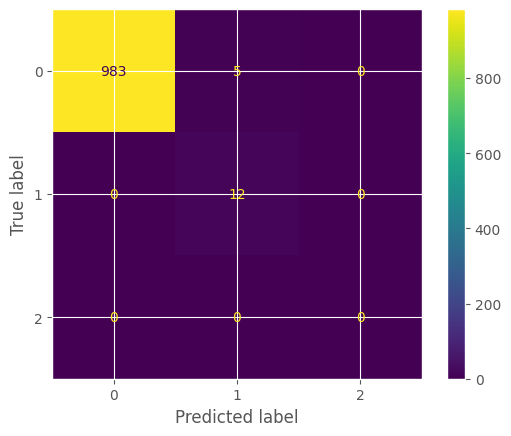

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, y_pred))

Root mean squared error: 0.07
Mean absolute error: 0.01
R-squared: 0.58


In [ ]:
import xgboost as xg
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 200, seed = 123)

In [ ]:
# Fitting the model
xgb_r.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:55:36] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
xgb_r.fit(X_test, y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
XGBoost_score = xgb_r.score(X_train, y_train)
XGBoost_score

0.7841188798407438

In [ ]:
XGBoost_score = xgb_r.score(X_test, y_test)
XGBoost_score

0.9999997357098666

In [ ]:
xgb_r_pred = xgb_r.predict(X_test)


In [ ]:
# Make predictions using the testing set
xgb_r_pred = xgb_r.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


xgb_accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", xgb_accuracy)
print("F1 Score:", f1)


Accuracy: 0.995
F1 Score: 0.9945753074756382


In [ ]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, xgb_r_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, xgb_r_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, xgb_r_pred))

Root mean squared error: 0.00
Mean absolute error: 0.00
R-squared: 1.00


In [ ]:
#Evaluate Models
print("Accuracy:")
print("Decision Tree accuracy: ", dt_accuracy)
print("K-Nearest Neighbour accuracy: ", kNN_accuracy)
print("Random forest accuracy: ", rf_accuracy)
print("Naive Bayes accuracy: ", nb_accuracy)
print("XGBoost accuracy: ",  xgb_accuracy)
print("\n")
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Decision Tree score: ", dt_score)
print("K-Nearest Neighbour score: ", kNN_score)
print("Random forest score: ", random_forest_score)
print("Naive Bayes score: ", nb_score)
print("XGBoost score: ", XGBoost_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Decision Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, dt_pred)))
print("K-Nearest Neighbour RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, kNN_y_pred)))
print("Random forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Naive Bayes RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, y_pred)))
print("XGBoost RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, xgb_r_pred)))

Accuracy:
Decision Tree accuracy:  0.999
K-Nearest Neighbour accuracy:  0.997
Random forest accuracy:  1.0
Naive Bayes accuracy:  0.995
XGBoost accuracy:  0.995


Scores:
Linear regression score:  0.853455594371614
Decision Tree score:  0.999
K-Nearest Neighbour score:  0.997
Random forest score:  1.0
Naive Bayes score:  0.995
XGBoost score:  0.9999997357098666


RMSE:
Linear regression RMSE: 0.04
Decision Trees RMSE: 0.03
K-Nearest Neighbour RMSE: 0.05
Random forest RMSE: 0.00
Naive Bayes RMSE: 0.07
XGBoost RMSE: 0.00


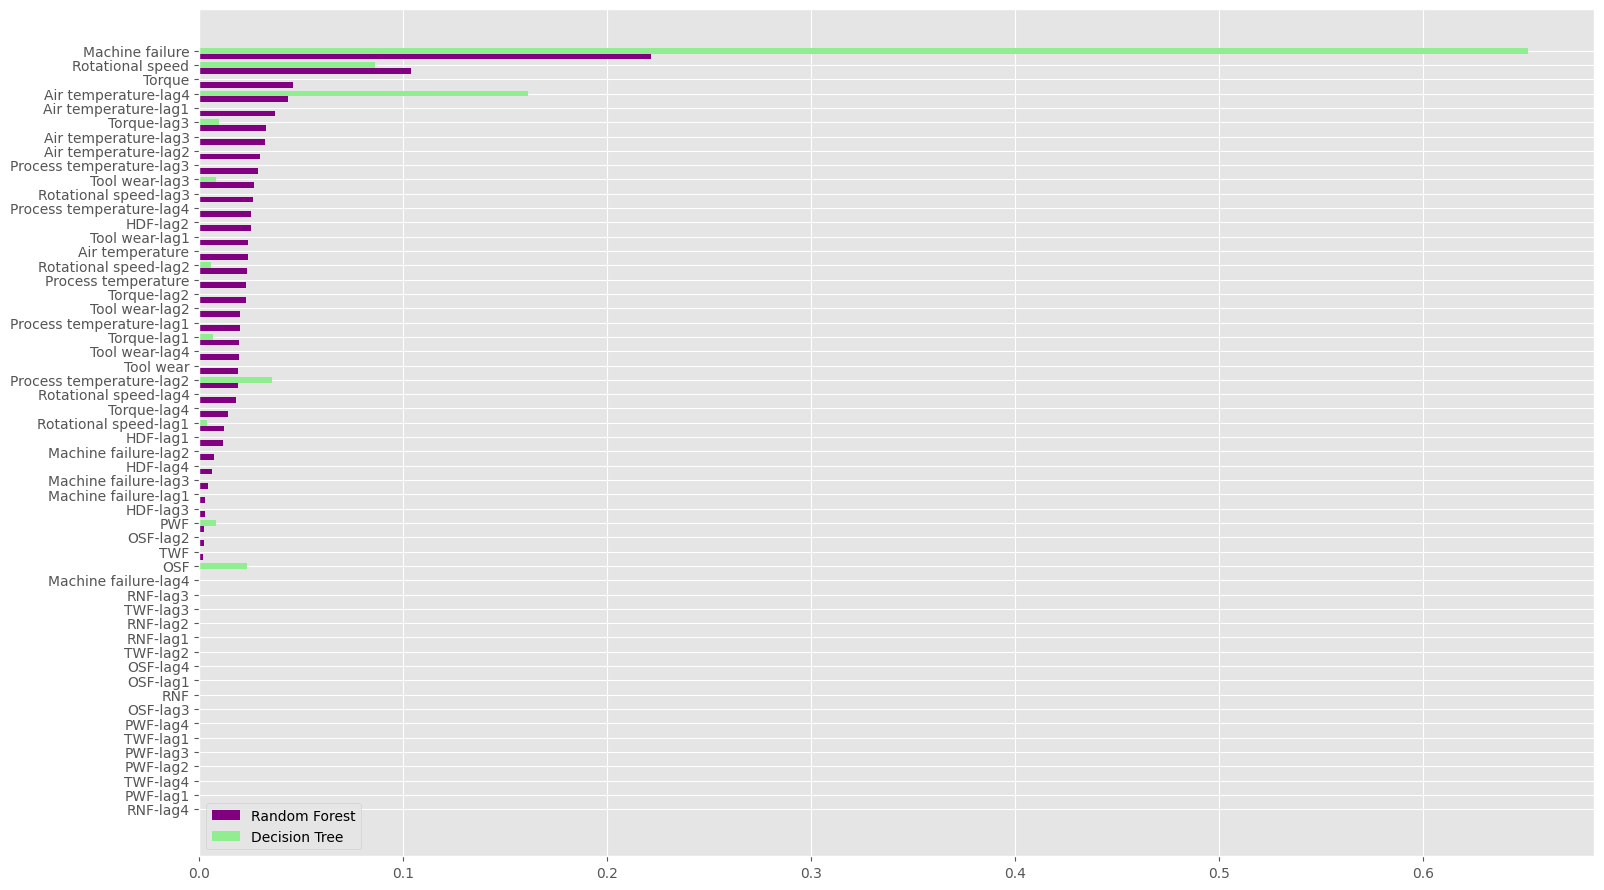

In [ ]:
feature_importance=pd.DataFrame({
    'regr_rf':regr_rf.feature_importances_,
    'dt':dt.feature_importances_
},index=p_1.drop(columns=['HDF']).columns)
feature_importance.sort_values(by='regr_rf',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,11))
regr_rf_feature=ax.barh(index,feature_importance['regr_rf'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()